# Модель состояния системы

### 1. Обработка данных

Сообщения от станции приходят независимо друг от друга. Каждое сообщение имеет Важность:
    - информативные 
    - предупредительные 
    - аварийные

Для дальнейшей работы необходимо:
    1. Определить временной отрезок*
    2. Сгруппировать сообщения по важности в рамках временно отрезка
    
*Длительность временного отрезка определяется на основе работы диспетчерской службы для анализа состояния станции и предупреждению аварийности.

! Данные прошли предворительную обработку и сохранены в файл prepare_data.csv

In [2]:
import pandas as pd

In [ ]:
# Подключаем необходимые библиотеки
import pandas as pd

# Загружаем обработанные файлы
df= pd.read_csv('data/prepare_data.csv', sep=',')
df.index = df['EventTime']
df.pop('EventTime')

EventTime
05.09.2019 22:00    05.09.2019 22:00
05.09.2019 23:00    05.09.2019 23:00
06.09.2019 0:00      06.09.2019 0:00
06.09.2019 1:00      06.09.2019 1:00
06.09.2019 2:00      06.09.2019 2:00
                          ...       
28.01.2022 2:00      28.01.2022 2:00
28.01.2022 3:00      28.01.2022 3:00
28.01.2022 4:00      28.01.2022 4:00
28.01.2022 5:00      28.01.2022 5:00
28.01.2022 6:00      28.01.2022 6:00
Name: EventTime, Length: 20967, dtype: object

In [5]:
df

,count_total,count_severity_info,count_severity_warning,count_severity_critical,mean7_count_severity_info,mean15_count_severity_info,mean30_count_severity_info,mean7_count_severity_warning,mean15_count_severity_warning,mean30_count_severity_warning,...,temp_prirost30_severity_critical,ratio_left7_severity_info,ratio_left15_severity_info,ratio_left30_severity_info,ratio_left7_severity_warning,ratio_left15_severity_warning,ratio_left30_severity_warning,ratio_left7_severity_critical,ratio_left15_severity_critical,ratio_left30_severity_critical
EventTime,,,,,,,,,,,,,,,,,,,,,
05.09.2019 22:00,610,451,157,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05.09.2019 23:00,103,77,26,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06.09.2019 0:00,166,111,54,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06.09.2019 1:00,147,122,24,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06.09.2019 2:00,681,590,89,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28.01.2022 2:00,462,402,38,22,238.494048,254.244444,263.038889,21.369048,22.575000,32.850000,...,41894.134897,1.858564,0.406572,0.098479,0.166527,0.036101,0.012299,0.015725,0.001772,0.000334
28.01.2022 3:00,927,828,36,63,239.404762,254.602778,263.279167,21.184524,22.566667,32.781944,...,42471.866871,1.860376,0.406616,0.098510,0.164622,0.036040,0.012266,0.015819,0.001788,0.000336
28.01.2022 4:00,289,275,12,2,237.446429,254.466667,263.254167,20.345238,22.558333,32.770833,...,53434.928230,1.866522,0.406606,0.098512,0.159930,0.036045,0.012263,0.014365,0.001793,0.000336


## 2. Входные параметры

Так как состояние работоспособности станции зависит от количества сообщений, то соответсвенно количество аварийных и предупредительных сообщений будут вносить наибольший вклад в общий показатель состояния работоспособности станции

In [3]:
# Подключение визуализации
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import pylab as pl
from matplotlib import ticker
from datetime import date

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

### Визуализация количества сообщений в час

<AxesSubplot:xlabel='EventTime'>

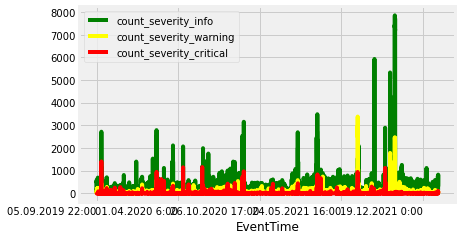

In [7]:
ax = plt.gca()
plt.gcf().autofmt_xdate()
df.plot(kind='line',use_index=True, y='count_severity_info',color='green', ax=ax)
df.plot(kind='line',use_index=True, y='count_severity_warning',color='yellow', ax=ax)
df.plot(kind='line',use_index=True, y='count_severity_critical',color='red', ax=ax)

<AxesSubplot:xlabel='EventTime'>

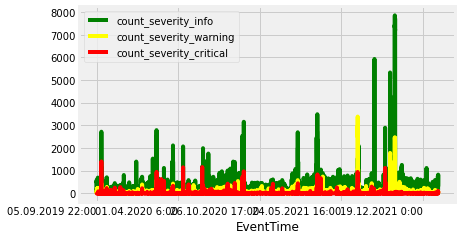

In [8]:
ax = plt.gca()
plt.gcf().autofmt_xdate()
df.plot(kind='line',use_index=True, y='count_severity_info',color='green', ax=ax)
df.plot(kind='line',use_index=True, y='count_severity_warning',color='yellow', ax=ax)
df.plot(kind='line',use_index=True, y='count_severity_critical',color='red', ax=ax)

```
По графику видно, что в работоспособности станции наблюдаются "взрывные" всплески количества сообщений, что характеризует высокую степень нештатной работы станции. Задача модели заранее предсказовать степень нештатной работоспособности станции, чтобы в случае повышенного значения предпринять заблаговременные действия по предотвращению аварийности. Для дальнейшей работы необходимо решить следующие задачи:
    1. Подготовить показатель характерезующий степень нештатной ситуации работоспособности станции
    2. Определить входные данные
    3. Уменьшить влияние "взрывных" всплесках в количестве сообщений
```

В качестве решения  задачи №3 вместо показателя количество сообщений в час выбран отношения количества сообщений по важности к общему количеству

In [9]:
def ratio_count(data, severity_name):
    data[f'ratio_count_{severity_name}'] = data[f'count_{severity_name}'] / data['count_total']

In [10]:
ratio_count(df, 'severity_info')
ratio_count(df, 'severity_warning')
ratio_count(df, 'severity_critical')

### Отношение аварийных сообщений к общему числу

<AxesSubplot:xlabel='EventTime'>

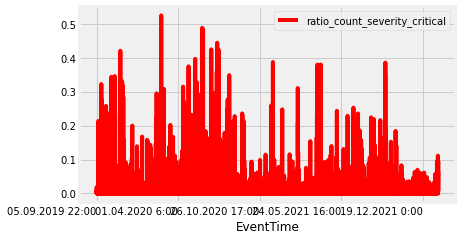

In [11]:
ax = plt.gca()
plt.gcf().autofmt_xdate()
df.plot(kind='line',use_index=True, y='ratio_count_severity_critical',color='red', ax=ax)

### Отношение предупредительных сообщений к общему числу

<AxesSubplot:xlabel='EventTime'>

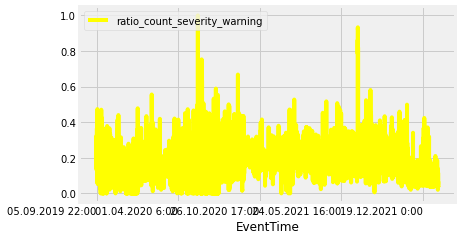

In [12]:
ax = plt.gca()
plt.gcf().autofmt_xdate()
df.plot(kind='line',use_index=True, y='ratio_count_severity_warning',color='yellow', ax=ax)

По графиком видно, что отношения сообщений по важности к общему числу, находяться в одном масштабе, и как следствие уменьшает воздействие "взравных" всплесков количества сообщений

### Определение показателя степени нештатной работоспособности станции

```
Показатель степени нештатной работоспособности станции определ как среднеквадатичное значение от отношения количества авариных и предупредительных сообщений к общему числу. Приемущество данного показателя в следующем:
1. Коррелирует с авариными и предупредительными сообщениями
2. 
```

In [13]:
from numpy import sqrt

# Коэффициент выравнивающий масштаб аварийных и предупредительных сообщений**
A = 2

# Функция расчёта модели показателя нештатной работоспособности станции
def state(data):
    data['state'] = sqrt((A*data['ratio_count_severity_critical'])**2 + data['ratio_count_severity_warning']**2)

In [14]:
state(df)

### Степень нештатной работоспособности станции

<AxesSubplot:xlabel='EventTime'>

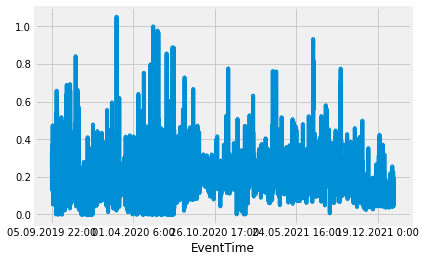

In [15]:
df['state'].plot()

** так как масштаб доли аварийных сообщений меньше долей предупредительных сообщений - то необходимо выровнить масштаб данных значений. На данный момент для этой задачи внесен коэффициент для долей авариный сообщений

### Нормализация степени нештатной работоспособности станции

Нормализация проводится для того, чтобы привести к масштабу от 0 до 1 - что удобно отображать как в процентном отношении: 100% - станция в аварийном режиме


In [16]:
df['state_target'] = (df['state'] - df['state'].min()) / (df['state'].max() - df['state'].min())

### Состояния модели за предыдущие дни

In [17]:
df['state_1d'] = df['state_target'].shift(1)
df['state_2d'] = df['state_target'].shift(2)
df['state_3d'] = df['state_target'].shift(3)

## 3. Обучение модели

In [18]:
df['qstate_normalize_mean_7h'] = df['state_target'].rolling(window=7).mean()

data = df.copy()

data.dropna(inplace=True)

# Входные данные
X = data[['ratio_count_severity_critical', 'ratio_count_severity_warning', 'ratio_count_severity_info', 'state_1d', 'state_2d', 'state_3d', 'qstate_normalize_mean_7h']]
# Выходные данные
y = data['state_target']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Модель линейной регрессии

In [20]:
from sklearn.linear_model import LinearRegression

model_linear_regression = LinearRegression()

model_linear_regression.fit(X_train, y_train)

LinearRegression()

In [21]:
train_score = model_linear_regression.score(X_train, y_train)
test_score = model_linear_regression.score(X_test, y_test)

print(f'train_score = {train_score}')
print(f'test_score = {test_score}')

train_score = 0.9673144576809625
test_score = 0.9669634213244408


In [22]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error

In [23]:
y_pred = model_linear_regression.predict(X_test)

print(f'Max Error = {max_error(y_pred, y_test)}')
print(f'Mean Abs Error = {mean_absolute_error(y_pred, y_test)}')

Max Error = 0.23120116345078878
Mean Abs Error = 0.008429021895653666


In [24]:
# Коэфициенты модели

pd.DataFrame(data=[model_linear_regression.coef_], columns = X.columns).T

,0
ratio_count_severity_critical,0.605542
ratio_count_severity_warning,0.150237
ratio_count_severity_info,-0.755779
state_1d,0.003887
state_2d,-0.008248
state_3d,-0.019891
qstate_normalize_mean_7h,0.060417


train_score = 0.9997467974494296
test_score = 0.9989656711915592
Max Error = 0.0891555495365619
Mean Abs Error = 0.0003794613283007144


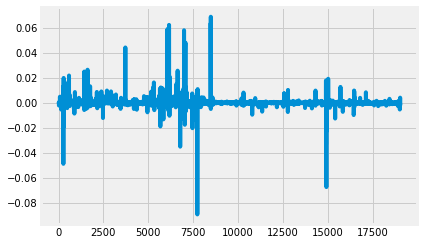

In [25]:
### Модель RandomForestRegressor

def train_and_evaluate_model(model):
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print(f'train_score = {train_score}')
    print(f'test_score = {test_score}')
    
    y_pred = model.predict(X_test)

    print(f'Max Error = {max_error(y_pred, y_test)}')
    print(f'Mean Abs Error = {mean_absolute_error(y_pred, y_test)}')
    
    y_full_pred = model.predict(X)
    pd.Series(list(y - y_full_pred)).plot()

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(100)

train_and_evaluate_model(rfr)

*** На графике ошибка модели

### Модель нейронной сети Sequential

In [26]:
!pip install tensorflow

In [27]:
from keras import models
from keras import layers

s = models.Sequential()
s.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
s.add(layers.Dense(1))
s.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

2022-05-23 03:12:13.186179: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-23 03:12:13.186267: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-05-23 03:12:16.009291: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-23 03:12:16.009380: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-23 03:12:16.009429: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (513737c139dd): /proc/driver/nvidia/version does not exist
2022-05-23 03:12:16.010064: I tensorflow/core/platform/cpu_featu

In [28]:

s.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

val_mse, val_mae = s.evaluate(X_test, y_test, verbose=1)

Epoch 1/100
12738/12738 [==============================] - 23s 2ms/step - loss: 5.5556e-04 - mae: 0.0119
Epoch 2/100
12738/12738 [==============================] - 23s 2ms/step - loss: 1.0631e-04 - mae: 0.0069
Epoch 3/100
12738/12738 [==============================] - 24s 2ms/step - loss: 5.1119e-05 - mae: 0.0050
Epoch 4/100
12738/12738 [==============================] - 25s 2ms/step - loss: 3.6129e-05 - mae: 0.0041
Epoch 5/100
12738/12738 [==============================] - 24s 2ms/step - loss: 2.6545e-05 - mae: 0.0035
Epoch 6/100
12738/12738 [==============================] - 24s 2ms/step - loss: 2.0796e-05 - mae: 0.0031
Epoch 7/100
12738/12738 [==============================] - 25s 2ms/step - loss: 1.7180e-05 - mae: 0.0028
Epoch 8/100
12738/12738 [==============================] - 25s 2ms/step - loss: 1.5018e-05 - mae: 0.0026
Epoch 9/100
12738/12738 [==============================] - 24s 2ms/step - loss: 1.4203e-05 - mae: 0.0025
Epoch 10/100
12738/12738 [=============================

In [31]:
s.save('sequential')

INFO:tensorflow:Assets written to: sequential/assets


In [32]:
val_mae

0.0025244380813091993